In [24]:
from astropy.coordinates import EarthLocation
from astropy.utils import iers
from astropy.coordinates import get_body_barycentric,get_body_barycentric_posvel, get_body, get_moon
from astropy.utils import iers
from astropy.coordinates import get_body_barycentric,get_body_barycentric_posvel, get_body, get_moon
from astropy.coordinates import solar_system_ephemeris
from astropy.coordinates import EarthLocation
from astropy import units
from astropy.coordinates import CartesianRepresentation, CartesianDifferential, SkyCoord, GCRS
from math import acos, cos
from astropy.timeseries import TimeSeries
import matplotlib.pyplot as plt
import numpy as np

import astropy
import astropy.coordinates
from astropy.time import Time
from importlib import reload  
from math import ceil
import doppler
import util
import os

In [98]:
#Setup Environment
from importlib import reload  
reload(doppler)
reload(util)
from doppler import DopplerSystemEME, save, load
from util import get_earth_grid, Grid, nearest, local_minimize

iers.conf.iers_auto_url = 'ftp://cddis.gsfc.nasa.gov/pub/products/iers/finals2000A.all'
solar_system_ephemeris.set('jpl') 


<ScienceState solar_system_ephemeris: 'jpl'>

In [99]:
#Setup Doppler Instance
start_string = '2020-01-01T00:00:00.00Z'
timestep = units.Quantity('15 min')
timespan = units.Quantity('24 hour')
emitters = [EarthLocation.from_geodetic(lat = "38°25'53.6", lon = "-79.839896°", height=0), 
           EarthLocation.from_geodetic(lat = "58°25'53.6", lon = "-50.839896°", height=0)]

reciever = EarthLocation.from_geodetic(lat = "38°25'53.6", lon ="-79°49'08.9", height=0)

start_time = Time(start_string, format='isot', scale='utc')
doppler_system = DopplerSystemEME(emitters, reciever, start_time, timestep, timespan, only_visible = False, signal=10e6)

In [27]:
#Calculate and save
doppler_system.update()
doppler_system.save_plots('demo1/')
#doppler_system.save('demo2/state.json')

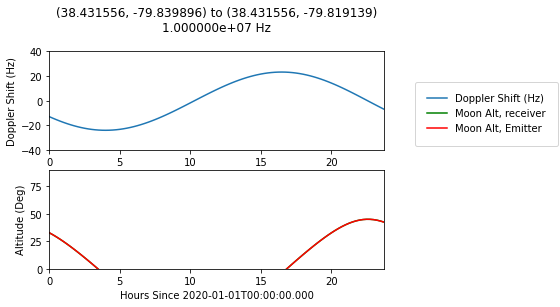

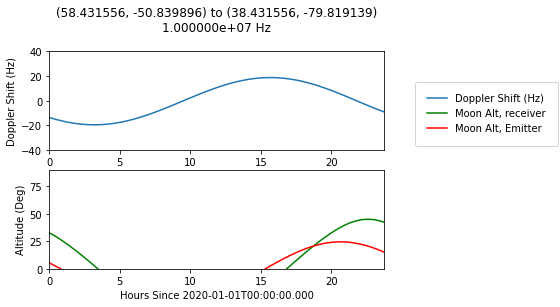

In [28]:
doppler_system.get_plot(0)
doppler_system.get_plot(1)

In [100]:
#Same, but with many emitters around Earth
grid = get_earth_grid(20)
emitters = grid.lst
reciever = EarthLocation.from_geodetic(lat = "38°25'53.6", lon ="-79°49'08.9", height=0) #GBT
start_string = '2020-01-01T00:00:00.00Z'
timestep = units.Quantity('15 min')
timespan = units.Quantity('4 hour')
start_time = Time(start_string, format='isot', scale='utc')
doppler_system2 = DopplerSystemEME(emitters, reciever, start_time, timestep, timespan, only_visible = True)

In [101]:
doppler_system2.update()
doppler_system2.save_plots('demo2/')

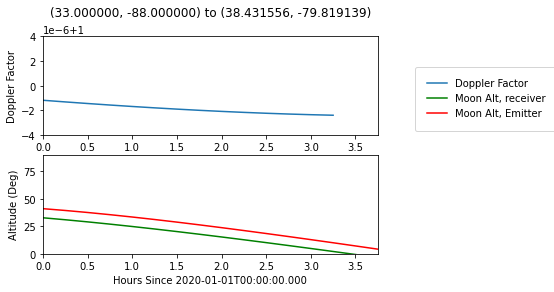

In [120]:
doppler_system3 = DopplerSystemEME([EarthLocation.from_geodetic(lat='33', lon= '-88')], reciever, start_time, timestep, timespan)
doppler_system3.update()
observation = doppler_system3.get_dopplers()[0]
doppler_system2.save_plots('demo3/')
doppler_system3.get_plot(0)

31d30m00s -90d00m00s


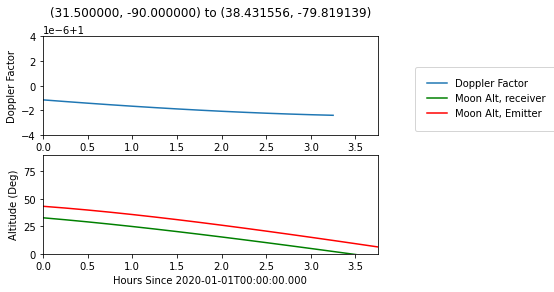

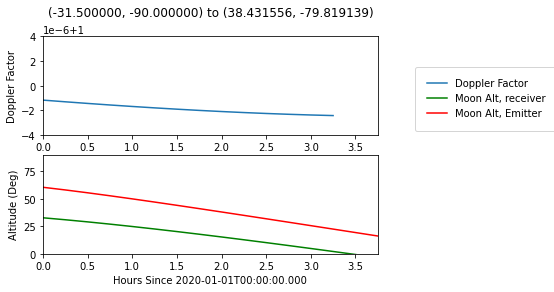

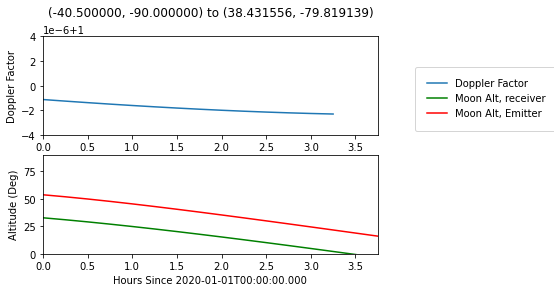

In [119]:
grid = get_earth_grid(20)
min_sort = local_minimize(grid, doppler_system2.get_dopplers(), observation)
print(emitters[min_sort[0]].lat, emitters[min_sort[0]].lon)
for i in min_sort[0:3]:
    doppler_system2.get_plot(i)
    